Prediksi Penyakit Jantung

Load Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

Load datasets

In [2]:
#Nama dataframe kita adalah df yang berisi data dari kc_house_data.csv.
#Features yang digunakan adalah 'bedrooms','bathrooms','sqft_living','grade','price' dan 'yr_built'
df = pd.read_csv('heart.csv')

Sneak Peek Data

In [3]:
#Melihat 5 baris teratas dari data
#Independent variabel(x) adalah bedrooms, bathrooms, sqft_living, grade, yr_built
#Dependent variabel(y) adalah price
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Penjelasan setiap kolom

In [4]:
#Mengetahui jumlah kolom dan baris dari data
#Data kita mempunya 12 kolom (features) dengan 918 baris
df.shape

(918, 12)

In [5]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
#Dapat dilihat bahwa seluruh data sudah di dalam bentuk numerik
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


cek apakah ada data NULL

In [7]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


### EDA ( Deskripsi Data )

In [8]:
print(df.describe())
print(df.info())
print(df.shape)

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 

In [9]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['Age'].astype(str).value_counts(dropna=False)

print(value_counts)

Age
54    51
58    42
55    41
56    38
57    38
52    36
62    35
59    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
43    24
46    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
67    15
39    15
40    13
69    13
66    13
37    11
35    11
68    10
74     7
70     7
34     7
36     6
32     5
71     5
72     4
75     3
29     3
31     2
33     2
77     2
76     2
30     1
28     1
73     1
Name: count, dtype: int64


In [10]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['Sex'].astype(str).value_counts(dropna=False)

print(value_counts)

Sex
M    725
F    193
Name: count, dtype: int64


In [11]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['ChestPainType'].astype(str).value_counts(dropna=False)

print(value_counts)

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


In [12]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['RestingBP'].astype(str).value_counts(dropna=False)

print(value_counts)

RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
101      1
117      1
192      1
129      1
164      1
Name: count, Length: 67, dtype: int64


In [13]:
#df['RestingBP'] = df['RestingBP'].replace(
#    to_replace=[0,80,92,93,94,95,96,97,98,100,101,102,104,105,106,112,113,114,115,116,118,108, 117, 110,119],
#    value='Normal'
#)

In [14]:
#df['RestingBP'] = df['RestingBP'].replace(
#    to_replace=[120,121,122,123,124,125,126,127,128, 129],
#    value='Normal Tinggi'
#)

In [15]:
# df['RestingBP'] = df['RestingBP'].replace(
#     to_replace=[130,131,132,133,134,135,136,137,138,139],
#     value='Hipertensi Stage1'
# )

In [16]:
# df['RestingBP'] = df['RestingBP'].replace(
#     to_replace=[140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,160,164,165,170,172,174,178],
#     value='Hipertensi Stage2'
# )

In [17]:
# df['RestingBP'] = df['RestingBP'].replace(
#     to_replace=[180,185,190,192,200],
#     value='Krisis hipertensi'
# )

In [18]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['RestingBP'].astype(str).value_counts(dropna=False)

print(value_counts)

RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
101      1
117      1
192      1
129      1
164      1
Name: count, Length: 67, dtype: int64


In [19]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['Cholesterol'].astype(str).value_counts(dropna=False)

print(value_counts)

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64


In [20]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['FastingBS'].astype(str).value_counts(dropna=False)

print(value_counts)

FastingBS
0    704
1    214
Name: count, dtype: int64


In [21]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['RestingECG'].astype(str).value_counts(dropna=False)

print(value_counts)

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


In [22]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['MaxHR'].astype(str).value_counts(dropna=False)

print(value_counts)

MaxHR
150    43
140    41
120    36
130    33
160    25
       ..
192     1
195     1
194     1
187     1
202     1
Name: count, Length: 119, dtype: int64


In [23]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['ExerciseAngina'].astype(str).value_counts(dropna=False)

print(value_counts)

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


In [24]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['Oldpeak'].astype(str).value_counts(dropna=False)

print(value_counts)

Oldpeak
0.0     368
1.0      86
2.0      76
1.5      53
3.0      28
1.2      26
0.2      22
0.5      19
1.4      18
1.8      17
2.5      16
1.6      16
0.8      16
0.1      14
0.6      14
0.3      11
0.4      11
4.0       8
2.8       7
0.7       7
1.3       7
1.1       7
2.6       7
1.9       7
1.7       6
2.2       5
3.6       4
0.9       4
2.4       4
3.4       3
2.1       2
3.2       2
2.3       2
-1.0      2
4.2       2
3.5       2
-0.1      2
-0.5      2
5.0       1
-0.7      1
-0.8      1
-1.5      1
-0.9      1
-2.6      1
-1.1      1
3.7       1
-2.0      1
3.1       1
5.6       1
3.8       1
2.9       1
6.2       1
4.4       1
Name: count, dtype: int64


In [25]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['ST_Slope'].astype(str).value_counts(dropna=False)

print(value_counts)

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [26]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['HeartDisease'].astype(str).value_counts(dropna=False)

print(value_counts)

HeartDisease
1    508
0    410
Name: count, dtype: int64


### visualisasi heart disease

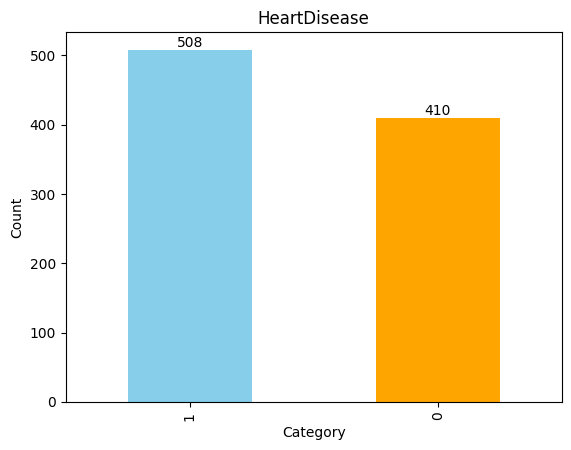

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

value_counts = df['HeartDisease'].value_counts()

# Create a bar chart
ax = value_counts.plot(kind='bar', color=['skyblue', 'orange'])

# Add title and labels
plt.title('HeartDisease')
plt.xlabel('Category')
plt.ylabel('Count')

# Add count labels on top of each bar
for i, count in enumerate(value_counts):
    ax.text(i, count , str(count), ha='center', va='bottom')

# Display the bar chart
plt.show()

### 

### Konversi ke nilai numerik

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [29]:
value_counts = df['Sex'].astype(str).value_counts(dropna=False)

print(value_counts)

Sex
1    725
0    193
Name: count, dtype: int64


In [30]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(df[['ChestPainType']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['ChestPainType'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
df = pd.concat([df.drop('ChestPainType', axis=1), one_hot_df], axis=1)

In [31]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(df[['RestingECG']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['RestingECG'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
df = pd.concat([df.drop('RestingECG', axis=1), one_hot_df], axis=1)

In [32]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(df[['ExerciseAngina']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['ExerciseAngina'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
df = pd.concat([df.drop('ExerciseAngina', axis=1), one_hot_df], axis=1)

In [33]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(df[['ST_Slope']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['ST_Slope'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
df = pd.concat([df.drop('ST_Slope', axis=1), one_hot_df], axis=1)

In [34]:
# Inisialisasi OneHotEncoder
#encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
#one_hot_encoded = encoder.fit_transform(df[['HeartDisease']])

# Dapatkan nama kolom baru dari encoder
#one_hot_columns = encoder.get_feature_names_out(['HeartDisease'])

# Buat DataFrame baru dari hasil One-Hot Encoding
#one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
#df = pd.concat([df.drop('HeartDisease', axis=1), one_hot_df], axis=1)

In [35]:
# Inisialisasi OneHotEncoder
##encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
#one_hot_encoded = encoder.fit_transform(df[['FastingBS']])

# Dapatkan nama kolom baru dari encoder
#one_hot_columns = encoder.get_feature_names_out(['FastingBS'])

# Buat DataFrame baru dari hasil One-Hot Encoding
#one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
#df = pd.concat([df.drop('FastingBS', axis=1), one_hot_df], axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   Oldpeak            918 non-null    float64
 7   HeartDisease       918 non-null    int64  
 8   ChestPainType_ASY  918 non-null    float64
 9   ChestPainType_ATA  918 non-null    float64
 10  ChestPainType_NAP  918 non-null    float64
 11  ChestPainType_TA   918 non-null    float64
 12  RestingECG_LVH     918 non-null    float64
 13  RestingECG_Normal  918 non-null    float64
 14  RestingECG_ST      918 non-null    float64
 15  ExerciseAngina_N   918 non-null    float64
 16  ExerciseAngina_Y   918 non

In [37]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,160,180,0,156,1.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1,130,283,0,98,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,0,138,214,0,108,1.5,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,1,150,195,0,122,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,1.2,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,1,144,193,1,141,3.4,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,1,130,131,0,115,1.2,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,0,130,236,0,174,0.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [38]:
df.to_csv('df-hddd.csv', index=False)

### Pre Processing

In [39]:
# mencari missing value
print(df.isnull().sum())
print(df.isna().sum())

#mencari data terduplikasi
print("data duplikasi:", df.duplicated().sum())

Age                  0
Sex                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_N     0
ExerciseAngina_Y     0
ST_Slope_Down        0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64
Age                  0
Sex                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_N     0
ExerciseAngina_Y     0
ST_Slope_Down        0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64
data duplikasi: 0


In [40]:
#mencari nilai yang tidak konsisten (nilai negatif pada data)
continuous_features = ['Age',
                      'RestingBP',
                      'Cholesterol',
                      'MaxHR',
                      'Oldpeak'
                     ]
for feature in continuous_features:
    print(str(feature)+': '+str(sum(df[feature] < 0)))

Age: 0
RestingBP: 0
Cholesterol: 0
MaxHR: 0
Oldpeak: 13


### karena ada yang negatif , maka diganti dengan rata rata

In [41]:
# Menghitung rata-rata kolom yang relevan (mengabaikan nilai negatif)
mean_Oldpeak = df.loc[df['Oldpeak'] >= 0, 'Oldpeak'].mean()

# Mengganti nilai negatif dengan rata-rata
df['Oldpeak'] = df['Oldpeak'].apply(lambda x: mean_Oldpeak if x < 0 else x)

#### visualisasi outliers dengan boxplot

Axes(0.125,0.11;0.775x0.77)


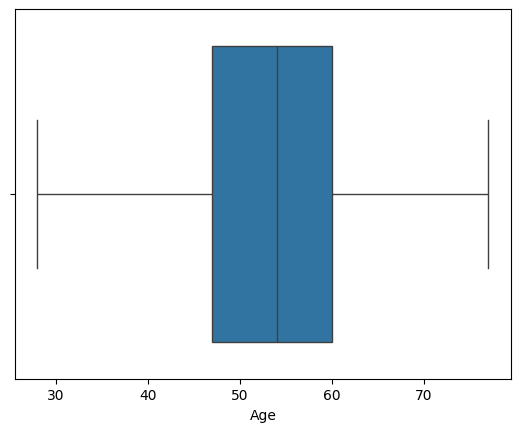

In [42]:
#boxlplot kolom age
print(sns.boxplot(x=df['Age']))

Axes(0.125,0.11;0.775x0.77)


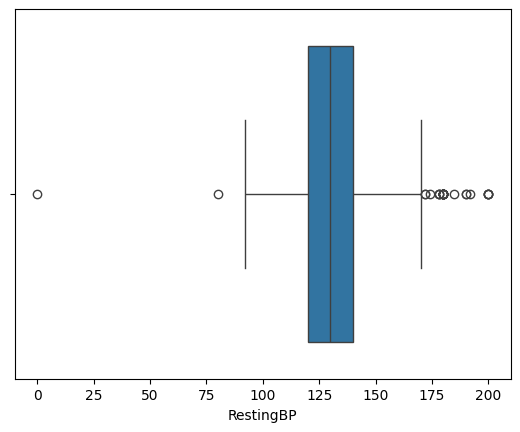

In [43]:
#boxlplot kolom trestbps
print(sns.boxplot(x=df['RestingBP']))

Axes(0.125,0.11;0.775x0.77)


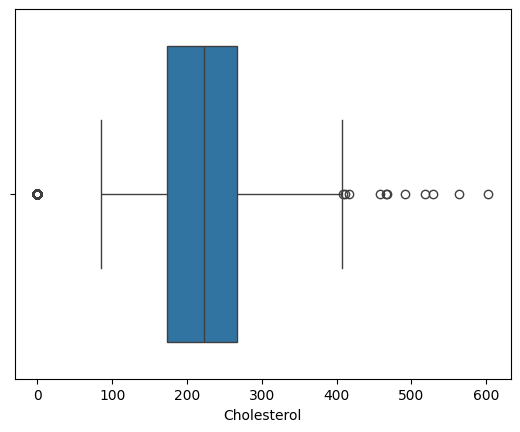

In [44]:
#boxlplot kolom chol
print(sns.boxplot(x=df['Cholesterol']))

Axes(0.125,0.11;0.775x0.77)


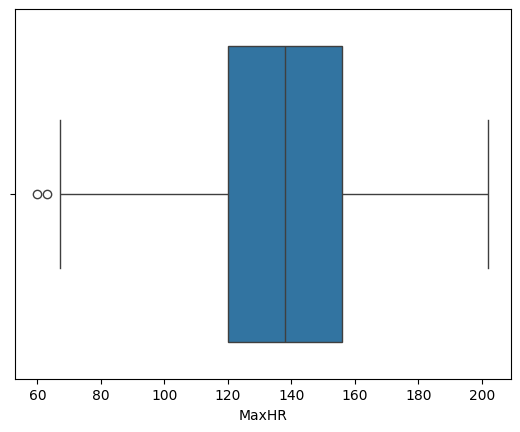

In [45]:
#boxlplot kolom thalach
print(sns.boxplot(x=df['MaxHR']))

Axes(0.125,0.11;0.775x0.77)


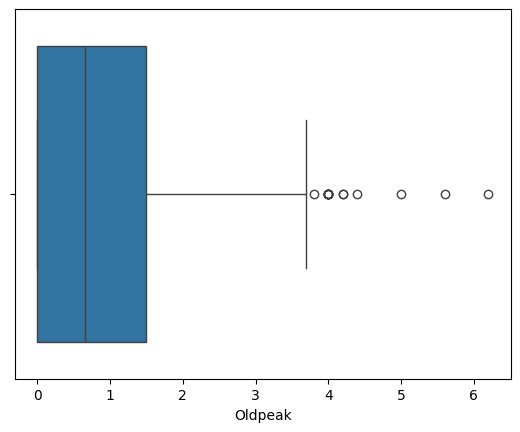

In [46]:
#boxlplot kolom oldpeak
print(sns.boxplot(x=df['Oldpeak']))

#### mengatasi outliers

In [47]:
#identifikasi outlier dan ubah ke null
for i in ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']:
  Q1,Q3 = np.percentile(df.loc[:,i],[25,75])
  IQR = Q3 - Q1
  upper = Q3+(1.5*IQR)
  lower = Q1-(1.5*IQR)
  df.loc[df[i] < lower,i] = np.nan
  df.loc[df[i] > upper,i] = np.nan

df.isnull().sum()

Age                    0
Sex                    0
RestingBP             28
Cholesterol          183
FastingBS              0
MaxHR                  2
Oldpeak               15
HeartDisease           0
ChestPainType_ASY      0
ChestPainType_ATA      0
ChestPainType_NAP      0
ChestPainType_TA       0
RestingECG_LVH         0
RestingECG_Normal      0
RestingECG_ST          0
ExerciseAngina_N       0
ExerciseAngina_Y       0
ST_Slope_Down          0
ST_Slope_Flat          0
ST_Slope_Up            0
dtype: int64

In [48]:
#imputasi outlier dengan median
columnc=['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for i in columnc:
  df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].median()

print(df.isnull().sum())
print(df.shape)

Age                  0
Sex                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_N     0
ExerciseAngina_Y     0
ST_Slope_Down        0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64
(918, 20)


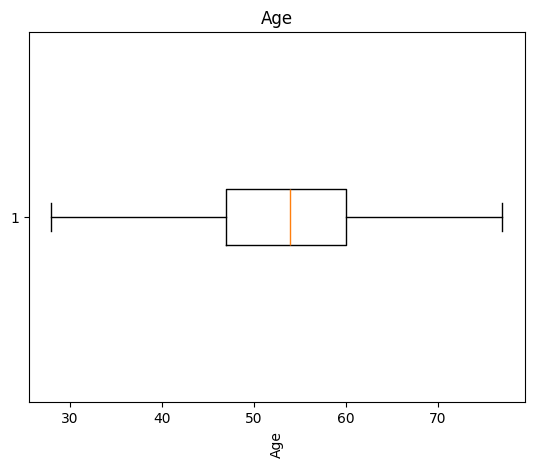

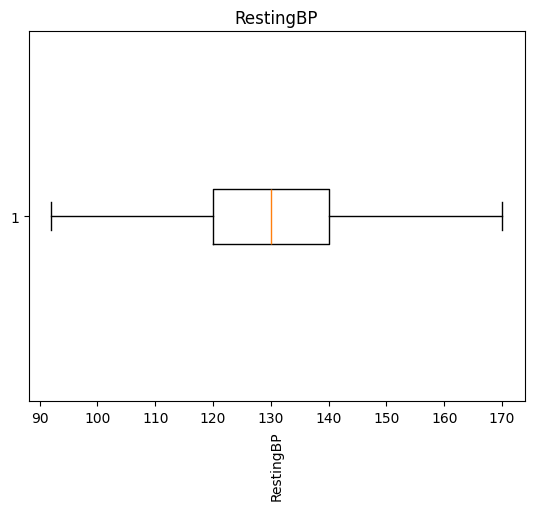

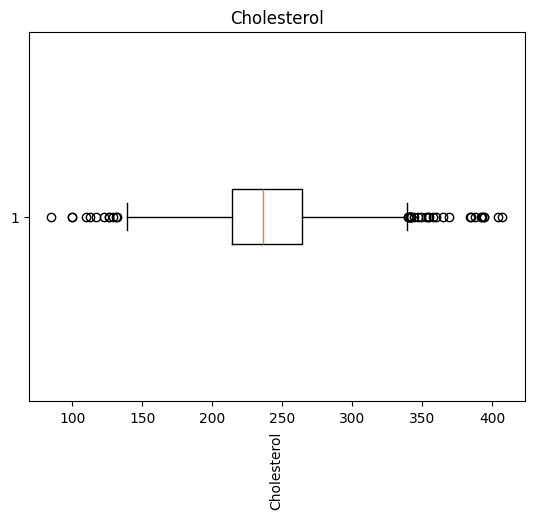

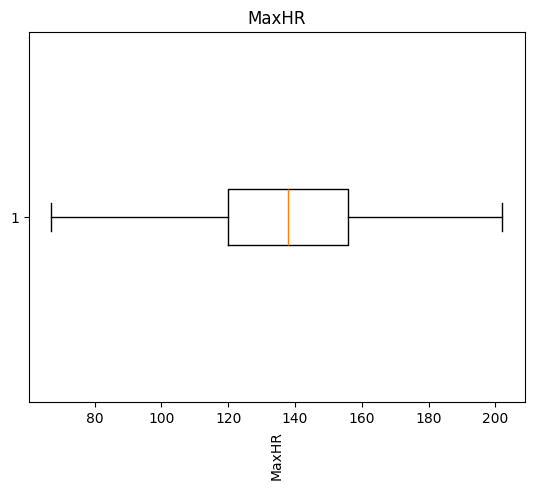

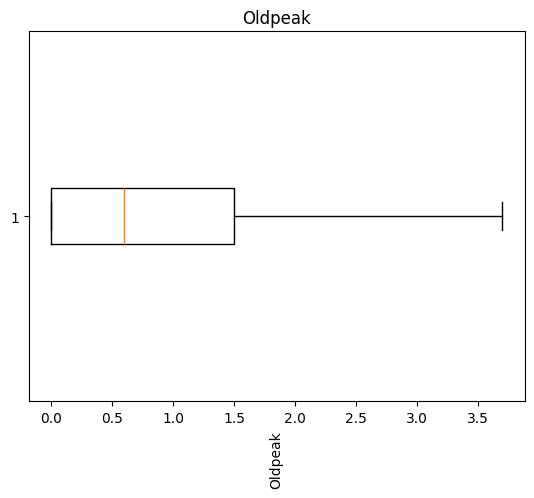

In [49]:
#membuat boxplot setelah menangani outlier

for cf in continuous_features:
    plt.boxplot(df[cf], vert=False)
    plt.title(cf)
    plt.xlabel(xlabel = cf,
               rotation=90)

    plt.show();

### EDA ( Univariate analysis )

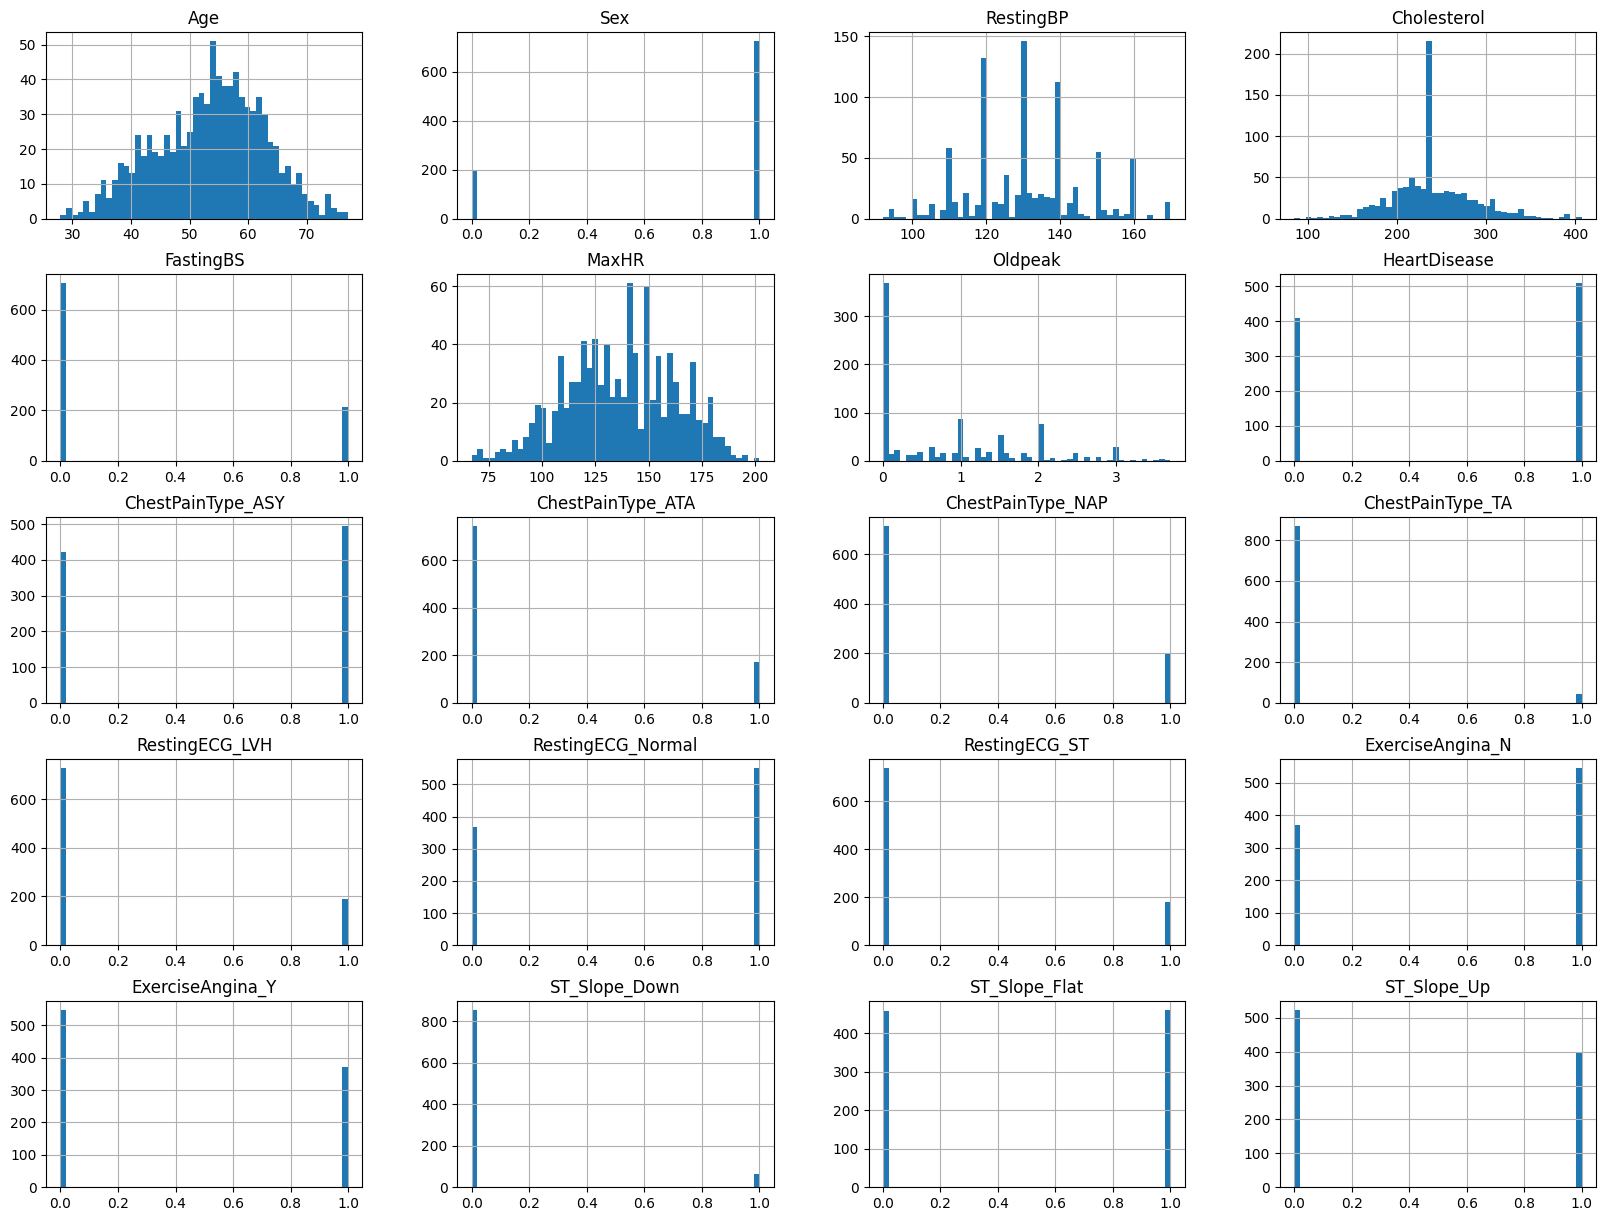

In [50]:
# univariate EDA
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPain', 'FastingBS','RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

df.hist(bins=50, figsize=(20,15))
plt.show()

### EDA (Multivariate analysis)

#### Melihat korelasi antar variabel dengan heatmap

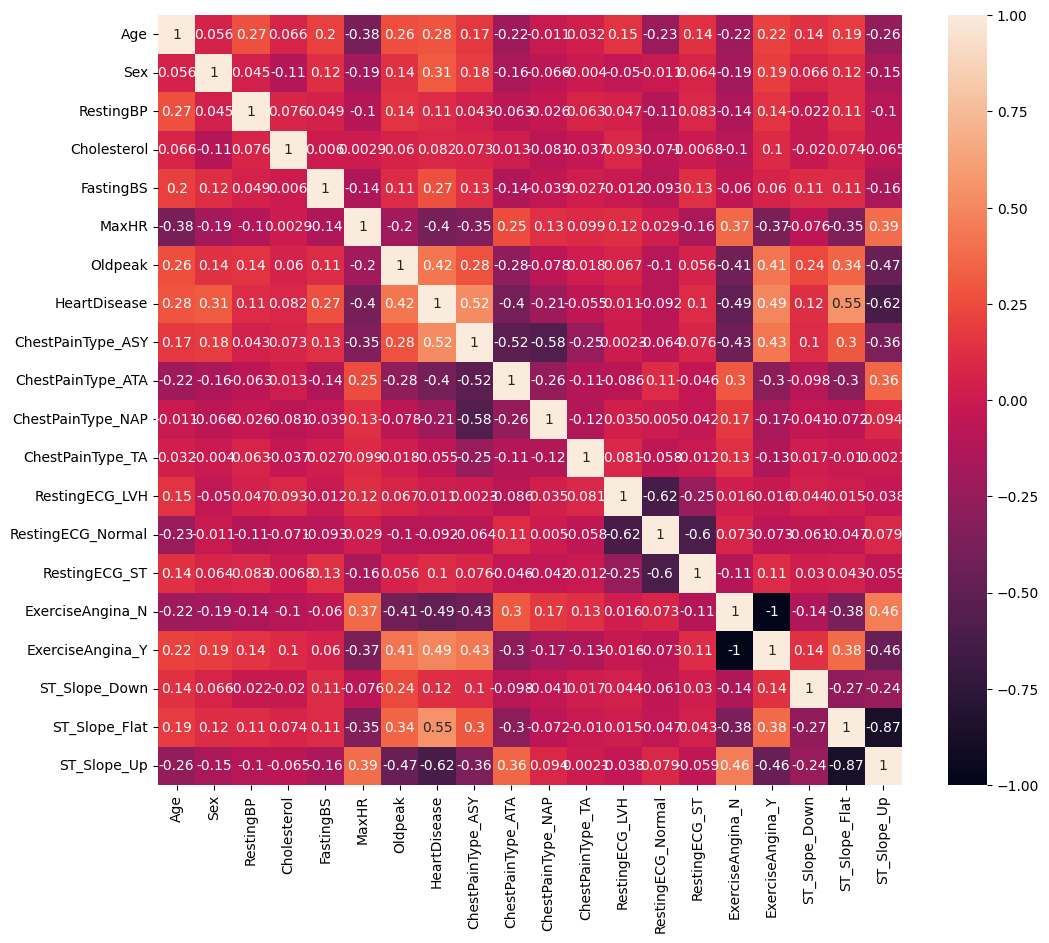

In [51]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), 
            annot=True);

### membagi dataset ke dalam training set dan test set

In [52]:
X = df.drop(["HeartDisease"],axis =1)
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [53]:
print(X)

     Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  \
0     40    1      140.0        289.0          0  172.0      0.0   
1     49    0      160.0        180.0          0  156.0      1.0   
2     37    1      130.0        283.0          0   98.0      0.0   
3     48    0      138.0        214.0          0  108.0      1.5   
4     54    1      150.0        195.0          0  122.0      0.0   
..   ...  ...        ...          ...        ...    ...      ...   
913   45    1      110.0        264.0          0  132.0      1.2   
914   68    1      144.0        193.0          1  141.0      3.4   
915   57    1      130.0        131.0          0  115.0      1.2   
916   57    0      130.0        236.0          0  174.0      0.0   
917   38    1      138.0        175.0          0  173.0      0.0   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0                  0.0                1.0                0.0   
1                  0.0                0.0              

In [54]:
print(y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


In [55]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [56]:
print(X_train)

     Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  \
378   70    1      140.0        236.0          1  157.0      2.0   
356   46    1      115.0        236.0          0  113.0      1.5   
738   65    0      160.0        360.0          0  151.0      0.8   
85    66    1      140.0        139.0          0   94.0      1.0   
427   59    1      140.0        236.0          0  117.0      1.0   
..   ...  ...        ...          ...        ...    ...      ...   
835   54    1      110.0        239.0          0  126.0      2.8   
192   48    1      130.0        245.0          0  160.0      0.0   
629   57    0      128.0        303.0          0  159.0      0.0   
559   64    1      134.0        273.0          0  102.0      0.6   
684   47    1      108.0        243.0          0  152.0      0.0   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
378                1.0                0.0                0.0   
356                1.0                0.0              

In [57]:
print(X_test)

     Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  \
306   55    1      115.0        236.0          1  155.0      0.1   
711   66    1      120.0        302.0          0  151.0      0.4   
298   51    1      110.0        236.0          1   92.0      0.0   
466   55    1      120.0        236.0          0  125.0      2.5   
253   62    1      140.0        271.0          0  152.0      1.0   
..   ...  ...        ...          ...        ...    ...      ...   
909   63    0      124.0        197.0          0  136.0      0.0   
293   65    1      115.0        236.0          0   93.0      0.0   
761   52    1      112.0        230.0          0  160.0      0.0   
2     37    1      130.0        283.0          0   98.0      0.0   
409   53    1      160.0        236.0          1  122.0      0.0   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
306                1.0                0.0                0.0   
711                1.0                0.0              

In [58]:
print(y_train)

378    1
356    1
738    0
85     1
427    1
      ..
835    1
192    0
629    0
559    1
684    1
Name: HeartDisease, Length: 734, dtype: int64


In [59]:
print(y_test)

306    1
711    0
298    1
466    1
253    0
      ..
909    1
293    1
761    1
2      0
409    1
Name: HeartDisease, Length: 184, dtype: int64


In [60]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test  = sc.transform(X_test)

In [61]:
# print(X_train)

In [62]:
# print(X_test)

In [63]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 918
Total # of sample in train dataset: 734
Total # of sample in test dataset: 184


## Model Development

### Model KNN

In [65]:
#model KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred2 = knn.predict(X_test)

## Evaluasi Model

In [66]:
# Model  KNN test akurasi
print(classification_report(y_test, y_pred2))
print("akurasi model knn:", knn.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57        77
           1       0.69      0.67      0.68       107

    accuracy                           0.64       184
   macro avg       0.63      0.63      0.63       184
weighted avg       0.64      0.64      0.64       184

akurasi model knn: 0.6358695652173914
